## Task 1

## Task 2

In [29]:
#import Jupiter as jp
import pandas as pd
import numpy as np

def Kippler(row):
    jupiter_mass =np.sqrt(((row["distance_km"]**3)*4*(np.pi)**2)/((row["period_days"]**2)*(6.67*10**-11)))

    return jupiter_mass

connectable = f"sqlite:///jupiter.db"
Query = ("SELECT * FROM moons")

moons_df = pd.read_sql(Query, connectable, index_col="moon")
moons_df["predicted_mass"] = moons_df.apply(Kippler, axis=1)
moons_df["T^2"] = (moons_df["period_days"]*86400)**2
moons_df["a^3"] = (moons_df["distance_km"]*1000)**3


In [30]:
from sklearn import linear_model

model = linear_model.LinearRegression(fit_intercept=False)

X = moons_df[["a^3"]]
Y = moons_df["T^2"]

model.fit(X,Y)

moons_df["pred_T^2"] = model.predict(X)


Text(0, 0.5, 'T^2')

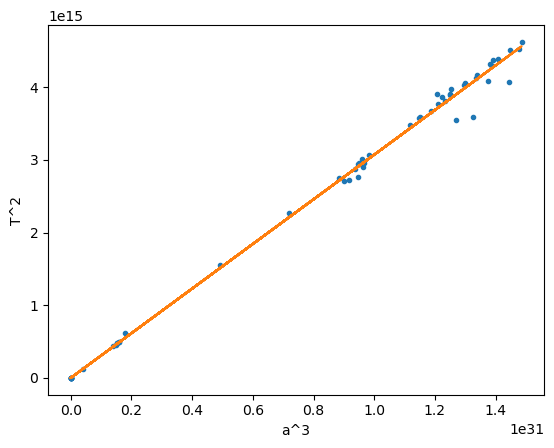

In [31]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots()

# Create a scatter plot of the known x-y values
ax.plot(moons_df["a^3"],moons_df["T^2"],'.')

# Draw a line to represent the predicted y-values
ax.plot(moons_df["a^3"],moons_df["pred_T^2"])

# Axis labels to be tidy
ax.set_xlabel("a^3")
ax.set_ylabel("T^2")